### Import packages

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import merging_functions as mf ### this package included part of the code that are repeated
                                 # throughout to make it more efficient
import matplotlib.pyplot as plt
from shapely import wkt

### Define city and work folder

In [2]:
city='Chicago'

FIPS = [17031, 17043, 17089, 17093, 17097, 17111, 17197]

folder = 'Output/'

### Load file and convert to pd geodataframe (for visualizing results)

In [3]:
typology_input = pd.read_csv(folder + 'typology_input.csv', index_col = 0) ### Read file
typology_input['geometry'] = typology_input['geometry'].apply(wkt.loads) ### Read geometry as a shp attribute
geo_typology_input  = gpd.GeoDataFrame(typology_input, geometry='geometry') ### Create the gdf
data = geo_typology_input.copy(deep=True)

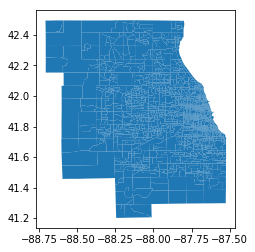

In [4]:
geo_typology_input.plot()
plt.show()

## Run Typology Method

### Additional variable treatment

#### Flag for sufficient pop in tract by 2000

In [5]:
### The input file has a flag for 2017 population, but this step will generate the same flag for 2000
data['pop00flag'] = np.where((data['pop_00'] >500), 1, 0)

POPULATION OVER 500 FOR YEAR 2000


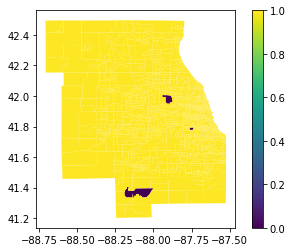

There are  4 census tract with pop<500 in 2000


In [6]:
print('POPULATION OVER 500 FOR YEAR 2000')
ax = data.plot(color = 'white')
ax = data.plot(ax = ax, column = 'pop00flag', legend = True)
plt.show()
print('There are ', len(data[data['pop00flag']==0]), 'census tract with pop<500 in 2000')

#### LI migration change
Percentage point - this is change from the 10 data, not the 2000 data because it didn't exist then

per_limove_XX = Percentage of people who moved into a tract in the last 5 years who are LI (20XX)

In [7]:
### Percentage point change in low income movers 10-17
data['ppt_ch_li_movein_10_17'] = data['per_limove_17'] - data['per_limove_10']
data[['per_limove_17', 'per_limove_10', 'ppt_ch_li_movein_10_17']].head()

,per_limove_17,per_limove_10,ppt_ch_li_movein_10_17
0,0.698195,0.585531,0.112664
1,0.632114,0.467007,0.165107
2,0.509776,0.483632,0.026144
3,0.252307,0.284149,-0.031842
4,0.253482,0.298065,-0.044583


PERCENT POINT CHANGE IN LOW INCOME MOVERS 2010-2017


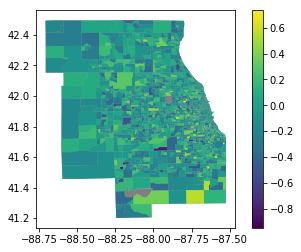

There are  7 census tract with NaN data


In [8]:
print('PERCENT POINT CHANGE IN LOW INCOME MOVERS 2010-2017')
ax = data.plot(color = 'grey')
ax = data[~data['ppt_ch_li_movein_10_17'].isna()].plot(ax = ax, column = 'ppt_ch_li_movein_10_17', legend = True)
plt.show()
print('There are ', len(data[data['ppt_ch_li_movein_10_17'].isna()]), 'census tract with NaN data')

#### Change in variables 2000 to 2017

In [9]:
### This should be recoded to eliminate infinite values 
variables = ['pop', 'per_col', 'real_mhval', 'real_mrent', 'all_li_count', 'per_all_li', 'real_hinc']

var_17 = list()
var_00 = list()
for i in variables:
    name_17 = i+'_17'
    var_17.append(name_17)
    name_00 = i+'_00'
    var_00.append(name_00)
    data['ch_'+i+'_00_17'] = data[name_17] - data[name_00]
    data['pctch_'+i+'_00_17'] = data['ch_'+i+'_00_17']/data[name_00]

In [10]:
data[var_17].describe()

,pop_17,per_col_17,real_mhval_17,real_mrent_17,all_li_count_17,per_all_li_17,real_hinc_17
count,1983.000000,1978.000000,1.961000e+03,1935.000000,1977.000000,1977.000000,1975.000000
mean,4298.007060,0.367454,2.566008e+05,1186.331783,609.806112,0.418698,69949.421772
std,2152.395845,0.228839,1.528026e+05,390.212466,348.715593,0.192992,34829.653992
min,0.000000,0.005277,1.930000e+04,282.000000,5.000000,0.050920,10471.000000
25%,2909.500000,0.175140,1.545000e+05,930.500000,348.548282,0.264132,44077.000000
50%,4110.000000,0.325818,2.190000e+05,1080.000000,552.353565,0.390925,63938.000000
75%,5336.000000,0.524795,3.202000e+05,1378.000000,801.309294,0.564891,89117.500000
max,28192.000000,0.952489,1.534500e+06,3501.000000,2708.590581,0.948278,250001.000000


In [11]:
data[var_00].describe()

,pop_00,per_col_00,real_mhval_00,real_mrent_00,all_li_count_00,per_all_li_00,real_hinc_00
count,1983.000000,1981.000000,1.983000e+03,1983.000000,1981.000000,1981.000000,1983.000000
mean,4108.061683,0.182516,2.307950e+05,954.061679,470.571537,0.335854,67971.189698
std,1597.594683,0.117299,1.728640e+05,502.386875,298.886544,0.182225,40440.598680
min,0.000000,0.000000,0.000000e+00,0.000000,2.496145,0.041049,0.000000
25%,2962.000000,0.083444,1.244402e+05,641.979250,249.867550,0.190105,39696.482500
50%,4009.000000,0.166181,1.903162e+05,902.471900,417.529720,0.311839,61090.516000
75%,5166.500000,0.265823,2.810616e+05,1143.052550,615.206200,0.442652,85724.155000
max,11287.000000,0.587875,1.607368e+06,5382.092000,2319.014200,1.000000,386842.220000


In [12]:
var_ch = list()
var_pctch = list()
for i in variables:
    name_ch = 'ch_'+i+'_00_17'
    var_ch.append(name_ch)
    name_pctch = 'pctch_'+i+'_00_17'
    var_pctch.append(name_pctch)

In [13]:
data[var_ch].describe()

,ch_pop_00_17,ch_per_col_00_17,ch_real_mhval_00_17,ch_real_mrent_00_17,ch_all_li_count_00_17,ch_per_all_li_00_17,ch_real_hinc_00_17
count,1983.000000,1978.000000,1.961000e+03,1935.000000,1977.000000,1977.000000,1975.000000
mean,189.945377,0.184828,2.431107e+04,228.699439,138.613049,0.083481,1746.295646
std,1467.554645,0.136498,1.224374e+05,502.913160,203.779419,0.105227,33957.892216
min,-5394.078351,-0.062077,-1.051368e+06,-3648.092000,-601.776592,-0.744026,-301023.940000
25%,-363.500000,0.076178,-2.408640e+04,5.621380,21.744452,0.028803,-14854.422500
50%,-12.000000,0.158184,8.905340e+03,153.362730,118.562144,0.088910,-4435.992000
75%,348.000000,0.270992,7.751566e+04,467.615600,244.908114,0.148093,17400.777000
max,20515.000000,0.737076,6.724000e+05,2760.117280,2096.186192,0.436829,149545.732000


In [14]:
data[var_pctch].describe()

,pctch_pop_00_17,pctch_per_col_00_17,pctch_real_mhval_00_17,pctch_real_mrent_00_17,pctch_all_li_count_00_17,pctch_per_all_li_00_17,pctch_real_hinc_00_17
count,1981.000000,1978.000000,1961.000000,1935.000000,1977.000000,1977.000000,1975.000000
mean,0.060303,inf,inf,inf,0.497514,0.376121,0.278809
std,0.450874,NaN,NaN,NaN,0.906447,0.485006,1.083239
min,-1.000000,-0.635397,-0.835210,-0.883826,-0.951630,-0.816580,-0.884883
25%,-0.097205,0.640857,-0.121693,0.006255,0.047450,0.094826,-0.216357
50%,-0.002806,0.970479,0.039861,0.164499,0.312126,0.309078,-0.063286
75%,0.095453,1.407377,0.425189,0.641339,0.658121,0.565746,0.401744
max,6.771958,inf,inf,inf,12.733079,5.434249,15.504938


In [15]:
data[['FIPS', 'pctch_per_col_00_17']][data['pctch_per_col_00_17']==np.inf]

,FIPS,pctch_per_col_00_17
793,17031835700,inf
911,17031831300,inf
1637,17031271300,inf


In [16]:
data[['FIPS', 'pctch_real_mhval_00_17']][data['pctch_real_mhval_00_17']==np.inf]

,FIPS,pctch_real_mhval_00_17
386,17031320400,inf
1770,17031283800,inf


In [17]:
data[['FIPS', 'pctch_real_mrent_00_17']][data['pctch_real_mrent_00_17']==np.inf]

,FIPS,pctch_real_mrent_00_17
936,17043841326,inf
1490,17031804706,inf


#### Change in variables 1990 to 2000

In [18]:
variables = ['pop', 'per_col', 'real_mhval', 'real_mrent', 'all_li_count', 'per_all_li', 'real_hinc']

var_90 = list()
var_00 = list()
for i in variables:
    name_90 = i+'_90'
    var_90.append(name_90)
    name_00 = i+'_00'
    data['ch_'+i+'_90_00'] = data[name_00] - data[name_90]
    data['pctch_'+i+'_90_00'] = data['ch_'+i+'_90_00']/data[name_90]

In [19]:
data[['pctch_all_li_count_90_00', 'pctch_all_li_count_00_17']].head()

,pctch_all_li_count_90_00,pctch_all_li_count_00_17
0,0.301511,0.164667
1,-0.130723,0.270726
2,0.096276,-0.092208
3,-0.185207,0.172630
4,-0.195752,0.064341


#### Variables to be compared to regional median

In [20]:
variables = ['mrent_90', 'real_mhval_90', 'real_mhval_00', 'per_all_li_90', 'per_nonwhite_90',
             'per_rent_90', 'per_col_90', 'per_col_17', 'ch_per_col_90_00', 'ch_per_col_00_17',
             'per_rent_17', 'per_nonwhite_17', 'per_all_li_17', 'pctch_real_mhval_90_00', 'pctch_real_mhval_00_17',
             'pctch_real_mrent_90_00', 'pctch_real_mrent_00_17', 'per_limove_10', 'per_limove_17', 'ppt_ch_li_movein_10_17',
             'per_units_pre50_17', 'pctch_real_hinc_90_00', 'pctch_real_hinc_00_17', 'mrent_00', 'per_all_li_00',
             'per_rent_00', 'per_nonwhite_00', 'per_col_00', 'empd_17', 'per_built_00_17',  'density_17', 'per_nhblk_17',
             'per_asian_17', 'per_hisp_17', 'pctch_all_li_count_90_00', 'pctch_all_li_count_00_17']

var_name = list()
var_median = list()

rm_variables={}
for i in variables:
    ### Creates variable names
    name = 'rm_'+i
    var_name.append(name)
    
    ### Computes variable median, ignores NaN data
    median = np.nanmedian(data[i])
    var_median.append(median)
    
    ### Adds it to the data dictionary for future reference
    rm_variables[name] = median

    ### Checks whether value is above regional median
    data['aboverm_'+i] = np.where(data[i]>=rm_variables[name], 1, 0)
    data['aboverm_'+i] = np.where(data[i].isna(), np.nan, data['aboverm_'+i])

rm_variables

{'rm_mrent_90': 440.0,
 'rm_real_mhval_90': 137567.72,
 'rm_real_mhval_00': 190316.23,
 'rm_per_all_li_90': 0.26918188,
 'rm_per_nonwhite_90': 0.16829303,
 'rm_per_rent_90': 0.3263777,
 'rm_per_col_90': 0.1307204,
 'rm_per_col_17': 0.325817855,
 'rm_ch_per_col_90_00': 0.020142385999999998,
 'rm_ch_per_col_00_17': 0.15818369499999999,
 'rm_per_rent_17': 36.2,
 'rm_per_nonwhite_17': 0.46159394,
 'rm_per_all_li_17': 0.390925,
 'rm_pctch_real_mhval_90_00': 0.20409861492874198,
 'rm_pctch_real_mhval_00_17': 0.03986117647787868,
 'rm_pctch_real_mrent_90_00': 0.031012922964407497,
 'rm_pctch_real_mrent_00_17': 0.16449939008929731,
 'rm_per_limove_10': 0.48253724,
 'rm_per_limove_17': 0.44211802,
 'rm_ppt_ch_li_movein_10_17': -0.03629321999999999,
 'rm_per_units_pre50_17': 0.23699422,
 'rm_pctch_real_hinc_90_00': 0.08110628866147244,
 'rm_pctch_real_hinc_00_17': -0.06328639205916613,
 'rm_mrent_00': 634.0,
 'rm_per_all_li_00': 0.31183857,
 'rm_per_rent_00': 0.31863979,
 'rm_per_nonwhite_00': 0

In [21]:
### Checks that code is running properly with one example
variable = 'pctch_all_li_count_00_17'
print(rm_variables['rm_'+variable])
data[[variable, 'aboverm_'+variable]].head(10)

# data[data[variable].isna()][[variable, 'aboverm_'+variable]].head()

0.3121255437774569


,pctch_all_li_count_00_17,aboverm_pctch_all_li_count_00_17
0,0.164667,0.0
1,0.270726,0.0
2,-0.092208,0.0
3,0.172630,0.0
4,0.064341,0.0
5,-0.586892,0.0
6,-0.202405,0.0
7,-0.270480,0.0
8,-0.371656,0.0
9,-0.334432,0.0


#### Loss of LI HH

In [22]:
data['ch_all_li_count_00_17'].isna().sum()

6

In [23]:
### Computes loss of LI HH - This needs to be double checked for missing values, because there are only zeroes
data['lostli_17'] = np.where((data['ch_all_li_count_00_17']<0)&(~data['ch_all_li_count_00_17'].isna()), 1, 0)
data['lostli_17'] = np.where((data['ch_all_li_count_00_17'].isna()), np.nan, data['lostli_17'])
data['lostli_00'] = np.where((data['ch_all_li_count_90_00']<0)&(~data['ch_all_li_count_90_00'].isna()), 1, 0)
data['lostli_00'] = np.where((data['ch_all_li_count_90_00'].isna()), np.nan, data['lostli_00'])

LOSS OF LI HH 2000-2017


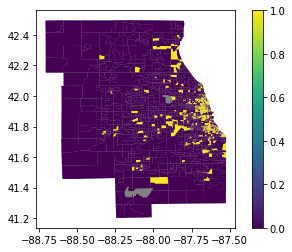

There are  6 census tract with NaN as data


In [24]:
print('LOSS OF LI HH 2000-2017')
ax = data.plot(color = 'grey')
ax = data[~data['lostli_17'].isna()].plot(ax = ax, column = 'lostli_17', legend = True)
plt.show()
print('There are ', data['lostli_17'].isna().sum(), 'census tract with NaN as data')

LOSS OF LI HH 1990-2000


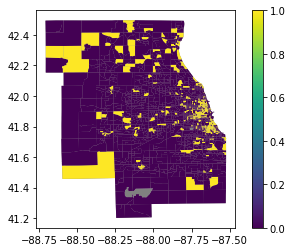

There are  2 census tract with NaN as data


In [25]:
print('LOSS OF LI HH 1990-2000')
ax = data.plot(color = 'grey')
ax = data[~data['lostli_00'].isna()].plot(ax = ax, column = 'lostli_00', legend = True)
plt.show()
print('There are ', data['lostli_00'].isna().sum(), 'census tract with NaN as data')

### Vulnerability to Gentrification

In [26]:
### Vulnerable to gentrification index, for both '90 and '00 - make it a flag

### ***** 1990 *****
### 2/4 Criteria that needs to be met
data['vul90_1'] = data['aboverm_per_all_li_90'] + data['aboverm_per_nonwhite_90'] + data['aboverm_per_rent_90']
data['vul90_2'] = np.where(data['aboverm_per_col_90']==0, 1, 0) ### This is the opposite criteria. Where flag = 0
data['vul90'] = data['vul90_1'] + data['vul90_2'] ### 2/4 of these criteria need to be met - This is included in vul_gent_90
data['vul90'] = np.where((data['per_all_li_90'].isna())|
                         (data['per_all_li_90'].isna())|
                         (data['per_all_li_90'].isna())|
                         (data['per_all_li_90'].isna()), np.nan, data['vul90'])

data['vul_gent_90'] = np.where(((data['mrent_90']<rm_variables['rm_mrent_90'])|(data['aboverm_real_mhval_90']==0))&
                               (data['vul90']>1)&(~data['vul90'].isna()), 1, 0)
data['vul_gent_90'] = np.where((data['mrent_90'].isna())|
                               (data['aboverm_real_mhval_90'].isna()), np.nan, data['vul_gent_90'])

### ***** 2000 *****
### 2/4 Criteria that needs to be met
data['vul00_1'] = data['aboverm_per_all_li_00'] + data['aboverm_per_nonwhite_00'] + data['aboverm_per_rent_00']
data['vul00_2'] = np.where(data['aboverm_per_col_00']==0, 1, 0) ### This is the opposite criteria. Where flag = 0
data['vul00'] = data['vul00_1'] + data['vul00_2'] ### 2/4 of these criteria need to be met - This is included in vul_gent_90
data['vul00'] = np.where((data['per_all_li_00'].isna())|
                         (data['per_all_li_00'].isna())|
                         (data['per_all_li_00'].isna())|
                         (data['per_all_li_00'].isna()), np.nan, data['vul00'])

data['vul_gent_00'] = np.where(((data['mrent_00']<rm_variables['rm_mrent_00'])|(data['aboverm_real_mhval_00']==0))&
                               (data['vul00']>1)&(~data['vul00'].isna()), 1, 0)
data['vul_gent_00'] = np.where((data['mrent_00'].isna())|
                               (data['aboverm_real_mhval_00'].isna()), np.nan, data['vul_gent_00'])

In [27]:
print(data['vul_gent_90'].describe())
print(data['vul_gent_00'].describe())

count    1983.000000
mean        0.384266
std         0.486544
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: vul_gent_90, dtype: float64
count    1983.000000
mean        0.419566
std         0.493612
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: vul_gent_00, dtype: float64


VULNERABLE IN 1990


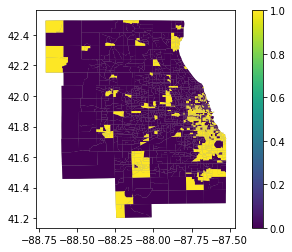

There are  0 census tract with NaN as data
There are  762 census tract with NaN as data


In [28]:
print('VULNERABLE IN 1990')
ax = data.plot(color = 'grey')
ax = data[~data['vul_gent_90'].isna()].plot(ax = ax, column = 'vul_gent_90', legend = True)
plt.show()
print('There are ', data['vul_gent_90'].isna().sum(), 'census tract with NaN as data')
print('There are ', (data['vul_gent_90']==1).sum(), 'census tract with NaN as data')

VULNERABLE IN 2000


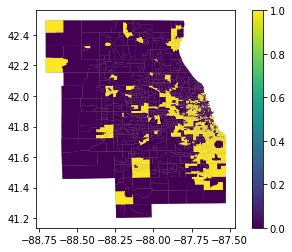

There are  0 census tract with NaN as data
There are  832 census tract with NaN as data


In [29]:
print('VULNERABLE IN 2000')
ax = data.plot(color = 'grey')
ax = data[~data['vul_gent_00'].isna()].plot(ax = ax, column = 'vul_gent_00', legend = True)
plt.show()
print('There are ', data['vul_gent_00'].isna().sum(), 'census tract with NaN as data')
print('There are ', (data['vul_gent_00']==1).sum(), 'census tract with NaN as data')

###### Out of curiosity

In [30]:
### Out of curiosity
data['vulnerable'] = data['vul_gent_90']*data['vul_gent_00']

VULNERABLE IN BOTH YEARS


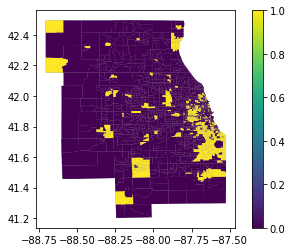

There are  0 census tract with NaN as data
There are  663 census tracts vulnerable in both years


In [31]:
print('VULNERABLE IN BOTH YEARS')
ax = data.plot(color = 'grey')
ax = data[~data['vulnerable'].isna()].plot(ax = ax, column = 'vulnerable', legend = True)
plt.show()
print('There are ', data['vulnerable'].isna().sum(), 'census tract with NaN as data')
print('There are ', (data['vulnerable']==1).sum(), 'census tracts vulnerable in both years')

### Hot Market

In [32]:
### Hot market in '00 and '17 - make it a flag:
### Using old methodology for now, will update later
### New methodology would be rapid increase (2013-2017)

data['hotmarket_17'] = np.where((data['aboverm_pctch_real_mhval_00_17']==1)|
                                (data['aboverm_pctch_real_mrent_00_17']==1), 1, 0)
data['hotmarket_17'] = np.where((data['aboverm_pctch_real_mhval_00_17'].isna())&
                                (data['aboverm_pctch_real_mrent_00_17'].isna()),np.nan,data['hotmarket_17'])

data['hotmarket_00'] = np.where((data['aboverm_pctch_real_mhval_90_00']==1)|
                                (data['aboverm_pctch_real_mrent_90_00']==1), 1, 0)
data['hotmarket_00'] = np.where((data['aboverm_pctch_real_mhval_90_00'].isna())&
                                (data['aboverm_pctch_real_mrent_90_00'].isna()),np.nan,data['hotmarket_00'])

In [33]:
print(data['hotmarket_17'].describe())
data.groupby('hotmarket_17').count()['FIPS']

count    1975.000000
mean        0.642025
std         0.479526
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: hotmarket_17, dtype: float64


hotmarket_17
0.0     707
1.0    1268
Name: FIPS, dtype: int64

In [34]:
print(data['hotmarket_00'].describe())
data.groupby('hotmarket_00').count()['FIPS']

count    1981.000000
mean        0.670873
std         0.470015
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: hotmarket_00, dtype: float64


hotmarket_00
0.0     652
1.0    1329
Name: FIPS, dtype: int64

HOT MARKET 2017


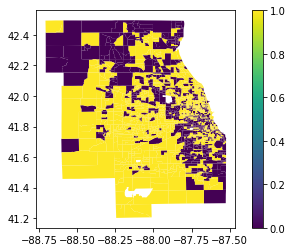

There are  8 census tract with NaN as data


In [35]:
print('HOT MARKET 2017')
ax = data.plot(color = 'white')
ax = data[~data['hotmarket_17'].isna()].plot(ax = ax, column = 'hotmarket_17', legend = True)
plt.show()
print('There are ', data['hotmarket_17'].isna().sum(), 'census tract with NaN as data')

HOT MARKET 2000


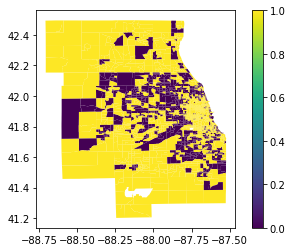

There are  2 census tract with NaN as data


In [36]:
print('HOT MARKET 2000')
ax = data.plot(color = 'white')
ax = data[~data['hotmarket_00'].isna()].plot(ax = ax, column = 'hotmarket_00', legend = True)
plt.show()
print('There are ', data['hotmarket_00'].isna().sum(), 'census tract with NaN as data')

### Gentrification

In [37]:
### 1990 - 2000

### Computes how many criteria are met
data['gent_90'] = data['aboverm_ch_per_col_90_00']+data['aboverm_pctch_real_hinc_90_00']+ (1-data['pctch_all_li_count_90_00'])

### Creates the dummy - if it meets more than 1 -> 1
data['gent_90_dem'] = np.where(data['gent_90']==3, 1, 0)
data['gent_90_dem'] = np.where((data['aboverm_ch_per_col_90_00'].isna())|
                               (data['aboverm_pctch_real_hinc_90_00'].isna())|
                               (data['lostli_00'].isna()), np.nan, data['gent_90_dem'])

### Make the overall gentrification variable
data['gent_90_00'] = np.where((data['vul_gent_90']==1)&
                              (data['gent_90_dem']==1)&
                              (data['hotmarket_00']==1), 1, 0)
data['gent_90_00'] = np.where((data['vul_gent_90'].isna())|
                               (data['gent_90_dem'].isna())|
                               (data['hotmarket_00'].isna()), np.nan, data['gent_90_00'])



# 2000 - 2017

### Computes how many criteria are met
data['gent_00'] = data['aboverm_ch_per_col_00_17']+data['aboverm_pctch_real_hinc_00_17']+(1-data['pctch_all_li_count_00_17'])

### Creates the dummy - if it meets more than 1 -> 1
data['gent_00_dem'] = np.where(data['gent_00']==3, 1, 0)
data['gent_00_dem'] = np.where((data['aboverm_ch_per_col_00_17'].isna())|
                               (data['aboverm_pctch_real_hinc_00_17'].isna())|
                               (data['lostli_00'].isna()), np.nan, data['gent_00_dem'])

### Make the overall gentrification variable
data['gent_00_17'] = np.where((data['vul_gent_00']==1)&
                              (data['gent_00_dem']==1)&
                              (data['per_limove_17']<data['per_limove_10'])& ### Should this be 2009??
                              (data['hotmarket_00']==1), 1, 0)
data['gent_00_17'] = np.where((data['vul_gent_00'].isna())|
                               (data['gent_00_dem'].isna())|
                               (data['per_limove_17'].isna())|
                               (data['per_limove_10'].isna())|
                               (data['hotmarket_00'].isna()), np.nan, data['gent_00_17'])

In [38]:
data[['FIPS', 'vul_gent_00', 'gent_00_dem', 'per_limove_17', 'per_limove_10', 'hotmarket_00']].describe()

,FIPS,vul_gent_00,gent_00_dem,per_limove_17,per_limove_10,hotmarket_00
count,1.983000e+03,1983.000000,1975.0,1977.000000,1976.000000,1981.000000
mean,1.705560e+10,0.419566,0.0,0.461242,0.493442,0.670873
std,4.720911e+07,0.493612,0.0,0.205474,0.205633,0.470015
min,1.703101e+10,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.703150e+10,0.000000,0.0,0.306574,0.344460,0.000000
50%,1.703182e+10,0.000000,0.0,0.442118,0.482537,1.000000
75%,1.704385e+10,1.000000,0.0,0.602405,0.636832,1.000000
max,1.719798e+10,1.000000,0.0,1.000000,1.000000,1.000000


GENTRIFICATION 1990 - 2000


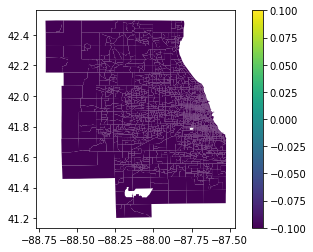

There are  2 census tract with NaN as data
0 census tracts were gentrified 1990-2000


In [39]:
print('GENTRIFICATION 1990 - 2000')
ax = data.plot(color = 'white')
ax = data[~data['gent_90_00'].isna()].plot(ax = ax, column = 'gent_90_00', legend = True)
plt.show()
print('There are ', data['gent_90_00'].isna().sum(), 'census tract with NaN as data')
print(str((data['gent_90_00']==1).sum()), 'census tracts were gentrified 1990-2000')

GENTRIFICATION 2000 - 2017


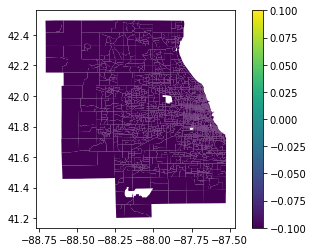

There are  9 census tract with NaN as data
0 census tracts were gentrified 2000-2017


In [40]:
print('GENTRIFICATION 2000 - 2017')
ax = data.plot(color = 'white')
ax = data[~data['gent_00_17'].isna()].plot(ax = ax, column = 'gent_00_17', legend = True)
plt.show()
print('There are ', data['gent_00_17'].isna().sum(), 'census tract with NaN as data')
print(str((data['gent_00_17']==1).sum()), 'census tracts were gentrified 2000-2017')

In [41]:
(data['gent_00_17']*data['gent_90_00']).sum()

0.0

### Typology definitions

Make flags for each typology definition - goal is to make them flags so we can compare accross typologies to check if any are being double counted or missed. Note on missing data: will code it so that the typology is missing if any of the core data elements are missing, but for any additional risk or stability criteria, will be coded so that it pulls from a shorter list if any are missing so as not to throw it all out


#### At Risk of Gentrification

In [42]:
df = data
### ************* At risk of gentrification **************

df['ARG_risks'] = df['aboverm_per_units_pre50_17'] + df['ab_90percentile_ch'] +\
                  df['exclusive_tract'] + df['rail'] + df['anchor_institution']

### Zillow increase flag - only above 90 perentile increase used

df['ARG_risks_missings'] = np.nan
df['ARG_risks_missings'] = (df['aboverm_per_units_pre50_17'].isna().astype('int'))+ \
                                (df['ab_90percentile_ch'].isna().astype('int'))+ \
                                (df['exclusive_tract'].isna().astype('int'))+ \
                                (df['rail'].isna().astype('int'))+ \
                                (df['anchor_institution'].isna().astype('int'))

# print(df.groupby('OD_instability_missings').count()['FIPS']) ### Summarizes how many FIPS have missing data

### This seems like a weird way to code the data
df['ARG_risks'] = np.where((df['ARG_risks_missings']==3)|
                           (df['ARG_risks_missings']==4)|
                           (df['ARG_risks_missings']==5), np.nan, df['ARG_risks'])

### I think these should be >=2 OR >3
df['ARG_risks'] = np.where((df['ARG_risks_missings']==2)|(df['ARG_risks']>=2), 1, df['ARG_risks'])
df['ARG_risks'] = np.where((df['ARG_risks_missings']==1)|(df['ARG_risks']==1), 0, df['ARG_risks'])
df['ARG_risks'] = np.where((df['ARG_risks_missings']==1)|(df['ARG_risks']>=2), 1, df['ARG_risks'])
df['ARG_risks'] = np.where((df['ARG_risks_missings']==0)|(df['ARG_risks']==1), 0, df['ARG_risks'])
df['ARG_risks'] = np.where((df['ARG_risks_missings']==0)|(df['ARG_risks']>=2), 1, df['ARG_risks'])

### ****ARG ****
df['ARG'] = 0
df['ARG'] = np.where((df['pop00flag']==1)&
                    ((df['low_pdmt_55cut_80120_medhhinc']==1)|(df['mix_low_55cut_80120_medhhinc']==1))&
                    ((df['lmh_flag_new_encoded']==1)|(df['lmh_flag_new_encoded']==2))&
                    ((df['aff_change_cat_full_encoded'] == 2)|(df['aff_change_cat_full_encoded'] == 3)|
                     (df['aff_change_cat_full_encoded'] == 6)|(df['aff_change_cat_full_encoded'] == 7))&
                     (df['gent_90_00']==0)&
                     (df['gent_00_17']==0)&
                     (df['ARG_risks']==1), 1, 0)

df['ARG'] = np.where((df['pop00flag'].isna())|
                     (df['low_pdmt_55cut_80120_medhhinc'].isna())|
                     (df['mix_low_55cut_80120_medhhinc'].isna())|
                     (df['lmh_flag_new_encoded'].isna())|
                     (df['aff_change_cat_full_encoded'].isna())|
                     (df['gent_90_00'].isna())|
                     (df['gent_00_17'].isna())|
                     (df['ARG_risks'].isna()), np.nan, df['ARG'])

AT RISK OF GENTRIFICATION


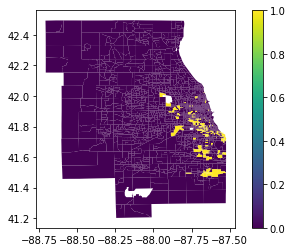

There are  9 census tract with NaN as data
There are  163 At Risk of Gentrification CT


In [43]:
print('AT RISK OF GENTRIFICATION')
ax = data.plot(color = 'white')
ax = data[~data['ARG'].isna()].plot(ax = ax, column = 'ARG', legend = True)
plt.show()
print('There are ', data['ARG'].isna().sum(), 'census tract with NaN as data')
print('There are ',str((data['ARG']==1).sum()), 'At Risk of Gentrification CT')

#### Ongoing Displacement

In [44]:
### Include a "churn" and a "hollowing-out/loss" version to examine
df = data

# gen OD_churn=0
# gen OD_loss=0

### Start with coding OD instability criteria variables
# For this, essentially add up the flagged variables, then can exclude those that don't meet enough criteria
# Note: this is accounting for missingness, see notes documentation in "notes" folder

### Stability Criteria
### Low access to capital
df['low_capital_access'] = np.where((df['low_app_rate'] == 1)|(df['high_denialrate20'] ==1), 1, 0)
df['low_capital_access'] = np.where((df['low_app_rate'].isna())|
                                    (df['high_denialrate20'].isna()), np.nan, data['low_capital_access'])

df['OD_instability_1'] = df['aboverm_foreclosurerate'] + df['vacancy_rm_flag'] + df['low_capital_access']
df['OD_instability_0'] = np.where(df['aboverm_homeownership_LItracts'] == 0, 1, 0)
df['OD_instability'] = df['OD_instability_1'] + df['OD_instability_0']

df['OD_instability_missings'] = (df['aboverm_foreclosurerate'].isna().astype('int'))+ \
                                (df['vacancy_rm_flag'].isna().astype('int'))+ \
                                (df['low_capital_access'].isna().astype('int'))+ \
                                (df['aboverm_homeownership_LItracts'].isna().astype('int'))

print(df.groupby('OD_instability_missings').count()['FIPS']) ### Summarizes how many FIPS have missing data

### This seems like a weird way to code the data
df['OD_instability'] = np.where((df['OD_instability_missings']==3)|(df['OD_instability_missings']==4), np.nan, df['OD_instability'])
df['OD_instability'] = np.where((df['OD_instability_missings']==2)|(df['OD_instability']==2), 1, df['OD_instability'])
df['OD_instability'] = np.where((df['OD_instability_missings']==1)|(df['OD_instability']<2), 0, df['OD_instability'])
df['OD_instability'] = np.where((df['OD_instability_missings']==1)|(df['OD_instability']>=2), 1, df['OD_instability'])
df['OD_instability'] = np.where((df['OD_instability_missings']==0)|(df['OD_instability']<2), 0, df['OD_instability'])
df['OD_instability'] = np.where((df['OD_instability_missings']==0)|(df['OD_instability']>=2), 1, df['OD_instability'])

print(df.groupby('OD_instability').count()['FIPS']) ### Summarizes how many FIPS have missing data

### **** OD churn ****
df['OD_churn'] = np.where((df['pop00flag']==1)&
                          ((df['low_pdmt_55cut_80120_medhhinc']==1)|(df['mix_low_55cut_80120_medhhinc']==1))&
                          ((df['lmh_flag_new_encoded']==1)|(df['lmh_flag_new_encoded']==2))&
                          ((df['aff_change_cat_full_encoded'] == 1)|(df['aff_change_cat_full_encoded'] == 2)|
                           (df['aff_change_cat_full_encoded'] == 5)|(df['aff_change_cat_full_encoded'] == 6))&
                          (df['aboverm_pct_recentmovein2010']==1)&
                          (df['flag_rm_units_change']==0), 1, 0)

# replace OD_churn=1 if A==1 & (B==1 |C==1) & (D==1| E==2) & ///
# (F==1 |  G==2| H==5 | I==6) & J==1 & K==0 

### Make version for stability criteria
df['OD_churn_unstable'] = df['OD_churn']
df['OD_churn_unstable'] = np.where(df['OD_instability'] == 1, 1, df['OD_churn_unstable'])

df['OD_churn'] = np.where((df['pop00flag']==1)&
                          ((df['low_pdmt_55cut_80120_medhhinc']==1)|(df['mix_low_55cut_80120_medhhinc']==1))&
                          ((df['lmh_flag_new_encoded']==1)|(df['lmh_flag_new_encoded']==2))&
                          ((df['aff_change_cat_full_encoded'] == 1)|(df['aff_change_cat_full_encoded'] == 2)|
                           (df['aff_change_cat_full_encoded'] == 5)|(df['aff_change_cat_full_encoded'] == 6))&
                          (df['aboverm_pct_recentmovein2010']==1)&
                          (df['flag_rm_units_change']==0), 1, 0)

df['OD_churn'] = np.where((df['pop00flag'].isna())|
                    (df['low_pdmt_55cut_80120_medhhinc'].isna())|
                    (df['mix_low_55cut_80120_medhhinc'].isna())|
                    (df['aboverm_pct_recentmovein2010'].isna())|
                    (df['lmh_flag_new_encoded'].isna())|
                    (df['flag_rm_units_change'].isna())|
                    (df['aff_change_cat_full_encoded'].isna()), np.nan, df['OD_churn'])

### **** OD loss ****
df['OD_loss'] = np.where((df['pop00flag']==1)&
                          ((df['low_pdmt_55cut_80120_medhhinc']==1)|(df['mix_low_55cut_80120_medhhinc']==1))&
                          ((df['lmh_flag_new_encoded']==1)|(df['lmh_flag_new_encoded']==2))&
                          ((df['aff_change_cat_full_encoded'] == 1)|(df['aff_change_cat_full_encoded'] == 2)|
                           (df['aff_change_cat_full_encoded'] == 5)|(df['aff_change_cat_full_encoded'] == 6))&
                          (df['lostli_17']==1), 1, 0)

df['OD_loss'] = np.where((df['pop00flag'].isna())|
                    (df['low_pdmt_55cut_80120_medhhinc'].isna())|
                    (df['mix_low_55cut_80120_medhhinc'].isna())|
                    (df['lmh_flag_new_encoded'].isna())|
                    (df['lostli_17'].isna())|
                    (df['aff_change_cat_full_encoded'].isna()), np.nan, df['OD_loss'])


# replace OD_loss=1 if A==1 & (B==1 |C==1) & (D==1| E==2) & (F==1 |  G==2| H==5 | I==6) ///
# & J==1 

### Make version for stability criteria
df['OD_loss_unstable'] = df['OD_loss']
df['OD_loss_unstable'] = np.where(df['OD_instability'] == 1, 1, df['OD_loss_unstable'])

df['OD'] = 0
df['OD'] = df['OD_churn'].fillna(0) + df['OD_loss'].fillna(0)
df['OD'] = np.where((df['OD_churn'].isna())&(df['OD_loss'].isna()), np.nan, df['OD'])
### Note: as is, if one of OD_churn or OD_loss is missing but the other is not, it will default to the one that isn't missing

df['OD'] = np.where(df['OD'] == 2, 1, df['OD'])
df['OD'] = np.where((df['OD'] == 1)&(df['ARG']==1), 0, df['OD']) ### This is to account for double classification

# egen OD_unstable=rowtotal(OD_loss_unstable OD_churn_unstable) 
# replace OD_unstable=. if OD_churn_unstable==. & OD_loss_unstable==.

OD_instability_missings
0    1345
1     628
2       6
3       4
Name: FIPS, dtype: int64
OD_instability
0.0     634
1.0    1345
Name: FIPS, dtype: int64


ONGOING DISPLACEMENT - CHURN


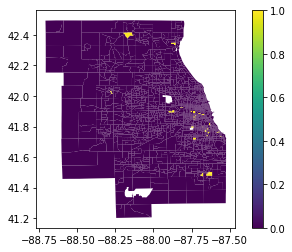

There are  6 census tract with NaN as data
There are  29 Ongoing Displacement - Churn CT


In [45]:
print('ONGOING DISPLACEMENT - CHURN')
ax = data.plot(color = 'white')
ax = data[~data['OD_churn'].isna()].plot(ax = ax, column = 'OD_churn', legend = True)
plt.show()
print('There are ', data['OD_churn'].isna().sum(), 'census tract with NaN as data')
print('There are ',str((data['OD_churn']==1).sum()), 'Ongoing Displacement - Churn CT')

ONGOING DISPLACEMENT - LOSS


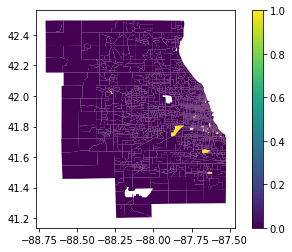

There are  6 census tract with NaN as data
There are  20 Ongoing Displacement - Loss CT


In [46]:
print('ONGOING DISPLACEMENT - LOSS')
ax = data.plot(color = 'white')
ax = data[~data['OD_loss'].isna()].plot(ax = ax, column = 'OD_loss', legend = True)
plt.show()
print('There are ', data['OD_loss'].isna().sum(), 'census tract with NaN as data')
print('There are ',str((data['OD_loss']==1).sum()), 'Ongoing Displacement - Loss CT')

ONGOING DISPLACEMENT


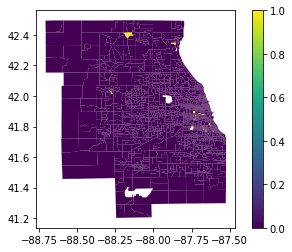

There are  6 census tract with NaN as data
There are  16 Ongoing Displacement CT


In [47]:
print('ONGOING DISPLACEMENT')
ax = data.plot(color = 'white')
ax = data[~data['OD'].isna()].plot(ax = ax, column = 'OD', legend = True)
plt.show()
print('There are ', data['OD'].isna().sum(), 'census tract with NaN as data')
print('There are ',str((data['OD']==1).sum()), 'Ongoing Displacement CT')

#### Early/Ongoing Gentrification

In [48]:
###************* Early/ongoing gentrification **************
### ****EOG ****
df['EOG'] = 0
df['EOG'] = np.where((df['pop00flag']==1)&
                    ((df['low_pdmt_55cut_80120_medhhinc']==1)|(df['mix_low_55cut_80120_medhhinc']==1))&
                     (df['per_limove_17']<df['per_limove_10'])&                     
                    ((df['lmh_flag_new_encoded'] == 1)|(df['lmh_flag_new_encoded'] == 2)|
                     (df['lmh_flag_new_encoded'] == 3)|(df['lmh_flag_new_encoded'] == 4))&
                    ((df['aff_change_cat_full_encoded'] == 3)|(df['aff_change_cat_full_encoded'] == 4)|
                     (df['aff_change_cat_full_encoded'] == 7)|(df['aff_change_cat_full_encoded'] == 8)|
                     (df['aff_change_cat_full_encoded'] == 11)|(df['aff_change_cat_full_encoded'] == 12)|
                     (df['aff_change_cat_full_encoded'] == 15)|(df['aff_change_cat_full_encoded'] == 16)|
                     (df['ab_50pct_ch'] == 1))&
                     ((df['gent_90_00']==1)|(df['gent_00_17']==1)), 1, 0)

df['EOG'] = np.where((df['pop00flag'].isna())|
                     (df['low_pdmt_55cut_80120_medhhinc'].isna())|
                     (df['mix_low_55cut_80120_medhhinc'].isna())|
                     (df['per_limove_17'].isna())|
                     (df['per_limove_10'].isna())|
                     (df['lmh_flag_new_encoded'].isna())|
                     (df['aff_change_cat_full_encoded'].isna())|
                     (df['gent_90_00'].isna())|
                     (df['gent_00_17'].isna())|
                     (df['ab_50pct_ch'].isna()), np.nan, df['EOG'])

# replace EOG=1 if A==1 & (B==1 |C==1) & D<E & (F==1| G==2 | H==3 | I==4) & (J==3|  K==4| L==7| M==8 | N==11| E==12| F==15| G==16| ab_50pct_ch==1)
#             & (gent_90_00==1 | gent_00_17==1)

EARLY/ONGOING GENTRIFICATION


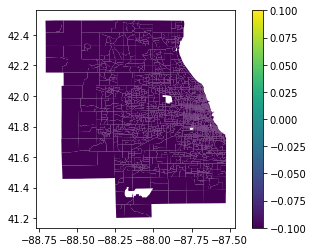

There are  9 census tract with NaN as data
There are  0 Early/Ongoing Gentrification CT


In [49]:
print('EARLY/ONGOING GENTRIFICATION')
ax = data.plot(color = 'white')
ax = data[~data['EOG'].isna()].plot(ax = ax, column = 'EOG', legend = True)
plt.show()
print('There are ', data['EOG'].isna().sum(), 'census tract with NaN as data')
print('There are ',str((data['EOG']==1).sum()), 'Early/Ongoing Gentrification CT')

#### Stable/Low-Income

In [50]:
### Original stata version
# df = data

# df['SLI'] = 0
# df['SLI'] = np.where((df['pop00flag'] == 1)&
#                      ((df['low_pdmt_55cut_80120_medhhinc_00'] == 1)|(df['mix_low_55cut_80120_medhhinc_00'] == 1))&
#                      ((df['low_pdmt_55cut_80120_medhhinc'] == 1)|(df['mix_low_55cut_80120_medhhinc'] == 1))&
#                       (df['aboverm_pct_recentmovein2010'] == 0)&  ### Stata code had 'var == 1'
#                      ((df['lmh_flag_new_encoded'] == 1)|(df['lmh_flag_new_encoded'] == 2))&
#                      ((df['aff_change_cat_full_encoded'] == 1)|(df['aff_change_cat_full_encoded'] == 2)|
#                      (df['aff_change_cat_full_encoded'] == 5)|(df['aff_change_cat_full_encoded'] == 6)), 1, 0)

# df['SLI'] = np.where((df['pop00flag'].isna())|
#                     (df['low_pdmt_55cut_80120_medhhinc_00'].isna())|
#                     (df['mix_low_55cut_80120_medhhinc_00'].isna())|
#                     (df['low_pdmt_55cut_80120_medhhinc'].isna())|
#                     (df['mix_low_55cut_80120_medhhinc'].isna())|
#                     (df['aboverm_pct_recentmovein2010'].isna())|
#                     (df['lmh_flag_new_encoded'].isna())|
#                     (df['aff_change_cat_full_encoded'].isna()), np.nan, df['SLI'])

### New version
df['SLI'] = 0
df['SLI'] = np.where((df['pop00flag'] == 1)&
                     ((df['low_pdmt_55cut_80120_medhhinc'] == 1)|(df['mix_low_55cut_80120_medhhinc'] == 1))&
                     (df['OD']!=1) & (df['ARG']!=1) *(df['EOG']!=1), 1, 0)

C:\Users\Gaby\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


STABLE LOW INCOME TRACTS


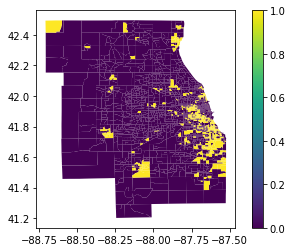

There are  0 census tract with NaN as data
There are  493 Stable Low Income CT


In [51]:
print('STABLE LOW INCOME TRACTS')
ax = data.plot(color = 'white')
ax = data[~data['SLI'].isna()].plot(ax = ax, column = 'SLI', legend = True)
plt.show()
print('There are ', data['SLI'].isna().sum(), 'census tract with NaN as data')
print('There are ',str((data['SLI']==1).sum()), 'Stable Low Income CT')

LOW INCOME TRACT - CLASSIFICATION


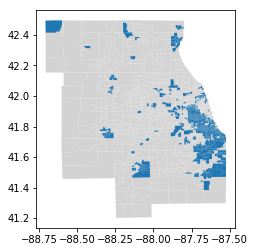

There are  0 census tract with NaN as data
There are  493 Stable Low Income CT


In [52]:
print('LOW INCOME TRACT - CLASSIFICATION')
ax = data.plot(color = 'lightgrey')
LI_ML_income = data[(data['low_pdmt_55cut_80120_medhhinc']==1) | (data['mix_low_55cut_80120_medhhinc']==1)]
LI_ML_income.plot(ax = ax)
# ax = data[].plot(color = 'white')
# ax = data[~data['SLI'].isna()].plot(ax = ax, column = 'SLI', legend = True)
plt.show()
print('There are ', data['SLI'].isna().sum(), 'census tract with NaN as data')
print('There are ',str((data['SLI']==1).sum()), 'Stable Low Income CT')

#### Stable/Advanced Exclusive

In [53]:
### ********* Stable/advanced exclusive *************

df['SAE'] = 0
df['SAE'] = np.where((df['pop00flag']==1)&
                     (df['high_pdmt_55cut_80120_medhhinc'] == 1)&
                     (df['high_pdmt_55cut_80120_00'] == 1)&                 
                    ((df['lmh_flag_new_encoded'] == 5)|(df['lmh_flag_new_encoded'] == 6))&
                    ((df['aff_change_cat_full_encoded'] == 18)|(df['aff_change_cat_full_encoded'] == 19)|
                     (df['aff_change_cat_full_encoded'] == 20)), 1, 0)

df['SAE'] = np.where((df['pop00flag'].isna())|
                     (df['high_pdmt_55cut_80120_medhhinc'].isna())|
                     (df['high_pdmt_55cut_80120_00'].isna())|
                     (df['lmh_flag_new_encoded'].isna())|
                     (df['aff_change_cat_full_encoded'].isna()), np.nan, df['SAE'])

# replace SAE=1 if A==1 & (A==1) & (B==1) & (C==5| D==6)& (E==18 | F==19 | G==20)

#### Advanced Gentrification

In [54]:
### ************* Advanced gentrification **************

df['AdvG'] = 0
df['AdvG'] = np.where((df['pop00flag']==1)&
                    ((df['mod_pdmt_55cut_80120_medhhinc'] == 1)|(df['high_pdmt_55cut_80120_medhhinc'] == 1)|
                     (df['mix_mod_55cut_80120_medhhinc'] == 1)|(df['mix_high_55cut_80120_medhhinc'] == 1))&                    
                    ((df['lmh_flag_new_encoded'] == 3)|(df['lmh_flag_new_encoded'] == 4)|
                     (df['lmh_flag_new_encoded'] == 5)|(df['lmh_flag_new_encoded'] == 6))&
                    ((df['aff_change_cat_full_encoded'] == 10)|(df['aff_change_cat_full_encoded'] == 11)|
                     (df['aff_change_cat_full_encoded'] == 14)|(df['aff_change_cat_full_encoded'] == 15)|
                     (df['aff_change_cat_full_encoded'] == 18)|(df['aff_change_cat_full_encoded'] == 19)|
                     (df['aff_change_cat_full_encoded'] == 22)|(df['aff_change_cat_full_encoded'] == 23))&
                     ((df['gent_90_00']==1)|(df['gent_00_17']==1)), 1, 0)

df['AdvG'] = np.where((df['pop00flag'].isna())|
                     (df['mod_pdmt_55cut_80120_medhhinc'].isna())|
                     (df['high_pdmt_55cut_80120_medhhinc'].isna())|
                     (df['mix_mod_55cut_80120_medhhinc'].isna())|
                     (df['mix_high_55cut_80120_medhhinc'].isna())|
                     (df['lmh_flag_new_encoded'].isna())|
                     (df['aff_change_cat_full_encoded'].isna())|
                     (df['gent_90_00'].isna())|
                     (df['gent_00_17'].isna()), np.nan, df['AdvG'])

df['AdvG'] = np.where((df['AdvG'] == 1)&(df['SAE']==1), 0, df['AdvG']) ### This is to account for double classification

# replace AdvG=1 if A==1 & (B==1|C==1|D==1|E==1) & (F==3| G==4| H==5| I==6) &
#                 (J==10 | K==11 | L==14| M==15| N==18 |O==19 |P==22|Q==23) & (R==1 | S==1)

In [55]:
df[(df['gent_90_00']==0)|(df['gent_00_17']==0)].count()

FIPS                       1981
COUNTYFP                   1981
geometry                   1981
countymedian_income90      1981
hinc_90                    1981
hinc_00                    1981
hinc_16                    1971
regmedian_income90         1981
vli_90                     1981
li_90                      1981
mi1990                     1981
hmi1990                    1981
hi1990                     1981
vhi1990                    1981
countymedian_income00      1981
vli_00                     1981
li_00                      1981
mi2000                     1981
hmi2000                    1981
hi2000                     1981
vhi2000                    1981
hinc_17                    1975
regmedhhi_17               1981
vli_17                     1977
li_17                      1977
mi2017                     1977
hmi2017                    1977
hi2017                     1977
vhi2017                    1977
r_per_nonwhite_90          1981
                           ... 
vul00_1 

ADVANCED GENTRIFICATION


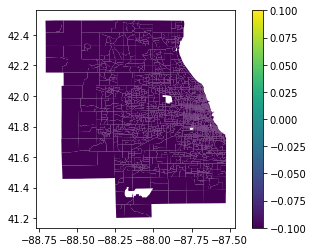

There are  9 census tract with NaN as data
There are  0 Advanced Gentrification CT


In [56]:
print('ADVANCED GENTRIFICATION')
ax = data.plot(color = 'white')
ax = data[~data['AdvG'].isna()].plot(ax = ax, column = 'AdvG', legend = True)
plt.show()
print('There are ', data['AdvG'].isna().sum(), 'census tract with NaN as data')
print('There are ',str((data['AdvG']==1).sum()), 'Advanced Gentrification CT')

#### Stable Moderate/Mixed Income

In [57]:
### ************* Stable moderate/mixed income *************
###Has to come after the other high income categories

#### At Risk of Becoming Exclusive

In [58]:
### *********** At risk of becoming exclusive *************

### Risk factors first

df['ARE_risk_factors_1'] = (df['aboverm_per_units_pre50_17'].fillna(0) +
                            df['aboverm_per_col_17'].fillna(0) + df['exclusive_tract'].fillna(0))
df['ARE_risk_factors_0'] = (df['presence_ph_LIHTC']==0).astype('int') + (df['aboverm_per_nonwhite_17']==0).astype('int')

### check where the variable for per_nonwhite_17 came from originally and that we have it in the merged dataset!!
### per_nonwhite_17 is in dataset and I will check where it came from  --- ?

df['ARE_risk_factors'] = df['ARE_risk_factors_1'] + df['ARE_risk_factors_0']

### This seems like a weird way to code the data
df['ARE_risks_missings'] = (df['aboverm_per_units_pre50_17'].isna().astype('int'))+ \
                                (df['aboverm_per_col_17'].isna().astype('int'))+ \
                                (df['exclusive_tract'].isna().astype('int'))+ \
                                (df['presence_ph_LIHTC'].isna().astype('int'))+ \
                                (df['aboverm_per_nonwhite_17'].isna().astype('int'))

df['ARE_risk_factors'] = np.where(df['ARE_risks_missings']>2, np.nan, df['ARE_risk_factors'])

df['ARE_risk_factors'] = np.where((df['ARE_risks_missings']==2)|(df['ARE_risk_factors']>=2), 1, df['ARE_risk_factors'])
df['ARE_risk_factors'] = np.where((df['ARE_risks_missings']==1)|(df['ARE_risk_factors']==1), 0, df['ARE_risk_factors'])
df['ARE_risk_factors'] = np.where((df['ARE_risks_missings']==1)|(df['ARE_risk_factors']>=2), 1, df['ARE_risk_factors'])
df['ARE_risk_factors'] = np.where((df['ARE_risks_missings']==0)|(df['ARE_risk_factors']==1), 0, df['ARE_risk_factors'])
df['ARE_risk_factors'] = np.where((df['ARE_risks_missings']==0)|(df['ARE_risk_factors']>=2), 1, df['ARE_risk_factors'])

print(df['ARE_risk_factors'].describe())


### Computes clasification
df['ARE'] = 0
df['ARE'] = np.where((df['pop00flag']==1)&
                    ((df['mod_pdmt_55cut_80120_medhhinc'] == 1)|(df['high_pdmt_55cut_80120_medhhinc'] == 1)|
                     (df['mix_mod_55cut_80120_medhhinc'] == 1)|(df['mix_high_55cut_80120_medhhinc'] == 1))&                   
                    ((df['lmh_flag_new_encoded'] == 3)|(df['lmh_flag_new_encoded'] == 4)|
                     (df['lmh_flag_new_encoded'] == 6))&
                    ((df['aff_change_cat_full_encoded'] == 10)|(df['aff_change_cat_full_encoded'] == 11)|
                     (df['aff_change_cat_full_encoded'] == 14)|(df['aff_change_cat_full_encoded'] == 15)|
                     (df['aff_change_cat_full_encoded'] == 22)|(df['aff_change_cat_full_encoded'] == 23))&
                     (df['ARE_risk_factors']==1), 1, 0)

df['ARE'] = np.where((df['pop00flag'].isna())|
                     (df['mod_pdmt_55cut_80120_medhhinc'].isna())|
                     (df['high_pdmt_55cut_80120_medhhinc'].isna())|
                     (df['mix_mod_55cut_80120_medhhinc'].isna())|
                     (df['mix_high_55cut_80120_medhhinc'].isna())|
                     (df['lmh_flag_new_encoded'].isna())|
                     (df['aff_change_cat_full_encoded'].isna())|
                     (df['ARE_risk_factors'].isna()), np.nan, df['ARE'])

# replace ARE=1 if A==1 & (B==1|C==1|C==1|D==1) & (E==3 | F==4| G==6) & (H==10|I==11|J==14|K==15|L==22|M==23) & ARE_risk_factors==1


count    1978.000000
mean        0.356421
std         0.479063
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ARE_risk_factors, dtype: float64


AT RISK OF BECOMING EXCLUSIVE


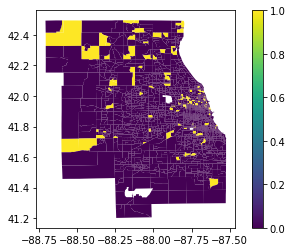

There are  6 census tract with NaN as data
There are  114 At Risk of Exclusive CT


In [59]:
print('AT RISK OF BECOMING EXCLUSIVE')
ax = data.plot(color = 'white')
ax = data[~data['ARE'].isna()].plot(ax = ax, column = 'ARE', legend = True)
plt.show()
print('There are ', data['ARE'].isna().sum(), 'census tract with NaN as data')
print('There are ',str((data['ARE']==1).sum()), 'At Risk of Exclusive CT')

#### Becoming Exclusive

In [60]:
### *********** Becoming exclusive *************
df['BE'] = 0
df['BE'] = np.where((df['pop00flag']==1)&
                    ((df['mod_pdmt_55cut_80120_medhhinc'] == 1)|(df['mix_mod_55cut_80120_medhhinc'] == 1)|
                     (df['mix_high_55cut_80120_medhhinc'] == 1))&                   
                    ((df['lmh_flag_new_encoded'] == 3)|(df['lmh_flag_new_encoded'] == 4)|
                     (df['lmh_flag_new_encoded'] == 5)|(df['lmh_flag_new_encoded'] == 6))&
                    ((df['aff_change_cat_full_encoded'] == 12)|(df['aff_change_cat_full_encoded'] == 16)|
                     (df['aff_change_cat_full_encoded'] == 20)|(df['aff_change_cat_full_encoded'] == 24))&
                     (df['all_li_count_17']<df['all_li_count_00'])&
                     (df['per_limove_17']<df['per_limove_10'])&
                     (df['real_hinc_17']>df['real_hinc_00']), 1, 0)

df['BE'] = np.where((df['pop00flag'].isna())|
                     (df['mod_pdmt_55cut_80120_medhhinc'].isna())|
                     (df['mix_mod_55cut_80120_medhhinc'].isna())|
                     (df['mix_high_55cut_80120_medhhinc'].isna())|
                     (df['lmh_flag_new_encoded'].isna())|
                     (df['all_li_count_17'].isna())|
                     (df['all_li_count_00'].isna())|
                     (df['per_limove_17'].isna())|
                     (df['per_limove_10'].isna())|
                     (df['real_hinc_17'].isna())|
                     (df['real_hinc_00'].isna()), np.nan, df['BE'])

# replace BE=1 if A==1 & (B==1|C==1|D==1) & (E==3| F==4|G==5 | H==6)& (I==12| J==16 | K==20| L==24) & M<N & O<P & Q>R

#### Stable Moderate/Mixed Income

In [61]:
### OLD version

# ### ********* Stable moderate/mixed income *************
# ## Note - this has to come after the typologies involving exclusion, since it relies on those definitions

# df['SMMI'] = 0
# df['SMMI'] = np.where((df['pop00flag']==1)&
#                      ((df['mod_pdmt_55cut_80120_medhhinc_00'] == 1)|(df['mix_mod_55cut_80120_medhhinc_00'] == 1)&
#                       (df['mix_high_55cut_80120_medhhinc_00'] == 1))&
#                      ((df['mod_pdmt_55cut_80120_medhhinc'] == 1)|(df['mix_mod_55cut_80120_medhhinc'] == 1)|
#                       (df['mix_high_55cut_80120_medhhinc'] == 1))&             
#                      ((df['lmh_flag_new_encoded'] == 3)|(df['lmh_flag_new_encoded'] == 4)|
#                       (df['lmh_flag_new_encoded'] == 6))&   
#                      ((df['aff_change_cat_full_encoded'] == 10)|(df['aff_change_cat_full_encoded'] == 11)|
#                       (df['aff_change_cat_full_encoded'] == 14)|(df['aff_change_cat_full_encoded'] == 15)|
#                       (df['aff_change_cat_full_encoded'] == 22)|(df['aff_change_cat_full_encoded'] == 23))&
#                      (df['ARE']==0)&(df['BE']==0)&(df['SAE']==0), 1, 0)


# df['SMMI'] = np.where((df['pop00flag'].isna())|
#                       (df['mod_pdmt_55cut_80120_medhhinc_00'].isna())|
#                       (df['mix_mod_55cut_80120_medhhinc_00'].isna())|
#                       (df['mix_high_55cut_80120_medhhinc_00'].isna())|
#                       (df['mod_pdmt_55cut_80120_medhhinc'].isna())|
#                       (df['mix_mod_55cut_80120_medhhinc'].isna())|
#                       (df['mix_high_55cut_80120_medhhinc'].isna())|
#                       (df['lmh_flag_new_encoded'].isna())|
#                       (df['aff_change_cat_full_encoded'].isna())|
#                       (df['ARE'].isna())|
#                       (df['BE'].isna())|
#                       (df['SAE'].isna()), np.nan, df['SMMI'])

# # replace SMMI=1 if A==1 & (A==1 | B==1 | C==1 ) & (D==1|E==1|F==1) & (G==3| H==4| I==6)& (J==10|K==11|L==14|M==15|N==22|O==23) & P==0 & Q==0 & R==0
# #* 8/16/19: this currently includes high income classification for 2000 and 2017, but does not include high for affordability or market change variables...


### New Version - Override
df['SMMI'] = 0
df['SMMI'] = np.where((df['pop00flag']==1)&
                     ((df['mod_pdmt_55cut_80120_medhhinc'] == 1)|(df['mix_mod_55cut_80120_medhhinc'] == 1)|
                      (df['mix_high_55cut_80120_medhhinc'] == 1)|(df['high_pdmt_55cut_80120_medhhinc'] == 1))&             
                     (df['ARE']==0)&(df['BE']==0)&(df['SAE']==0)&(df['AdvG']==0), 1, 0)

## Create Typology variables from all the dummies

In [62]:
df['double_counted'] = (df['SLI'].fillna(0) + df['OD'].fillna(0) + df['ARG'].fillna(0) + df['EOG'].fillna(0) +
                       df['AdvG'].fillna(0) + df['ARE'].fillna(0) + df['BE'].fillna(0) + df['SAE'] + df['SMMI'])
    
df['typology'] = np.nan
df['typology'] = np.where(df['SLI'] == 1, 1, df['typology'])
df['typology'] = np.where(df['OD'] == 1, 2, df['typology'])
df['typology'] = np.where(df['ARG'] == 1, 3, df['typology'])
df['typology'] = np.where(df['EOG'] == 1, 4, df['typology'])
df['typology'] = np.where(df['AdvG'] == 1, 5, df['typology'])
df['typology'] = np.where(df['SMMI'] == 1, 6, df['typology'])
df['typology'] = np.where(df['ARE'] == 1, 7, df['typology'])
df['typology'] = np.where(df['BE'] == 1, 8, df['typology'])
df['typology'] = np.where(df['SAE'] == 1, 9, df['typology'])
df['typology'] = np.where(df['double_counted']>1, 99, df['typology'])

# label def typology_name 0 "No typology applied"  1 "Stable Low Income" 2 "Ongoing Displacement" 3 "At Risk of Gentrification" 4 "Early/ Ongoing Gentrification" 5 "Advanced Gentrification" 6 "Stable Middle/Mixed Income" 7 "At Risk of Exclusion" 8 "Becoming Exclusive" 9 "Stable Advanced Exclusion" 99 "Multiple typologies applied"

#### Double Classification

In [63]:
cat_i = list()

# df = data[(data['low_pdmt_55cut_80120_medhhinc'] == 1)|(df['mix_low_55cut_80120_medhhinc'] == 1)].reset_index (drop=True)
df = data
for i in range (0, len (df)):
    categories = list()
    if df['SLI'][i] == 1:
        categories.append('SLI')
    if df['OD'][i] == 1:
        categories.append('OD')
    if df['ARG'][i] == 1:
        categories.append('ARG')
    if df['EOG'][i] == 1:
        categories.append('EOG')
    if df['AdvG'][i] == 1:
        categories.append('AdvG')
    if df['SMMI'][i] == 1:
        categories.append('SMMI')
    if df['ARE'][i] == 1:
        categories.append('ARE')
    if df['BE'][i] == 1:
        categories.append('BE')
    if df['SAE'][i] == 1:
        categories.append('SAE')
    cat_i.append(str(categories))
    
df['typ_cat'] = cat_i

In [64]:
df.groupby('typ_cat').count()['FIPS']

typ_cat
['ARE']      114
['ARG']      163
['BE']        46
['OD']        16
['SAE']      134
['SLI']      493
['SMMI']    1011
[]             6
Name: FIPS, dtype: int64

In [65]:
print(len(df[(df['typ_cat']== '[]')]))
print(len(df[(df['typ_cat']== '[]')&(df['BE'].isna())]))

6
6


In [66]:
comm_areas = gpd.read_file('Input_Files/Chicago/shp/commareas_chicago.shp')
comm_areas.head()

,community,perimeter,comarea_,comarea_id,area_numbe,cartodb_id,area,shape_area,shape_len,created_at,updated_at,area_num_1,geometry
0,KENWOOD,0.0,0,0,39,5,0.0,2.907174e+07,23325.167906,2015-06-19,2015-06-19,39,POLYGON ((-87.59215283878491 41.81692934706857...
1,LINCOLN SQUARE,0.0,0,0,4,6,0.0,7.135233e+07,36624.603085,2015-06-19,2015-06-19,4,POLYGON ((-87.67440756779521 41.97610340524936...
2,HYDE PARK,0.0,0,0,41,8,0.0,4.510538e+07,29746.708202,2015-06-19,2015-06-19,41,POLYGON ((-87.58037662084507 41.80252502285023...
3,WOODLAWN,0.0,0,0,42,9,0.0,5.781518e+07,46936.959244,2015-06-19,2015-06-19,42,"POLYGON ((-87.57714456890425 41.7861464109302,..."
4,ROGERS PARK,0.0,0,0,1,10,0.0,5.125990e+07,34052.397576,2015-06-19,2015-06-19,1,POLYGON ((-87.65455590024227 41.99816615053946...


In [67]:
df['BE'] = np.where((df['pop00flag'].isna())|
                     (df['mod_pdmt_55cut_80120_medhhinc'].isna())|
                     (df['mix_mod_55cut_80120_medhhinc'].isna())|
                     (df['mix_high_55cut_80120_medhhinc'].isna())|
                     (df['lmh_flag_new_encoded'].isna())|
                     (df['all_li_count_17'].isna())|
                     (df['all_li_count_00'].isna())|
                     (df['per_limove_17'].isna())|
                     (df['per_limove_10'].isna())|
                     (df['real_hinc_17'].isna())|
                     (df['real_hinc_00'].isna()), np.nan, df['BE'])

In [68]:
len(df[df['per_limove_17'].isna()])

6

In [69]:
df.groupby('typology').count()['FIPS']

typology
1.0     493
2.0      16
3.0     163
6.0    1011
7.0     114
8.0      46
9.0     134
Name: FIPS, dtype: int64

TYPOLOGIES


C:\Users\Gaby\Anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

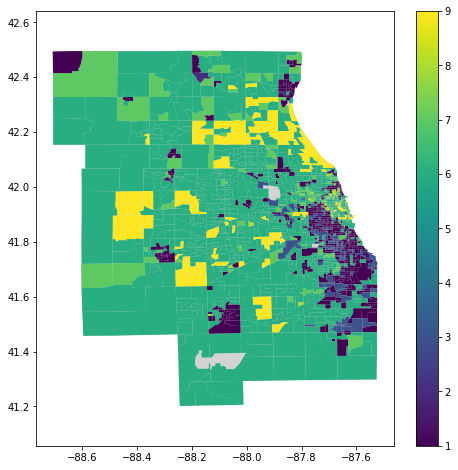

In [70]:
print('TYPOLOGIES')

f, ax = plt.subplots(1, figsize=(8, 8))
data.plot(ax=ax, color = 'lightgrey')
lims = plt.axis('equal')
data[(~data['typology'].isna())&(data['typology']!=99)].plot(ax = ax, column = 'typology', legend = True)
# data[data['typology']==99].plot(ax =ax, color = 'red')
plt.show()
print('There are ', data['typology'].isna().sum(), 'census tract with NaN as data')